In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file_path = "games.csv"
df = pd.read_csv(file_path, index_col=False)

print("Shape:", df.shape)
df.head()

Shape: (122611, 39)


,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DiscountDLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,2539430,Black Dragon Mage Playtest,"Aug 1, 2023",0 - 0,0,0,0.00,0,0,NaN,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,https://shared.akamai.steamstatic.com/store_it...
1,496350,Supipara - Chapter 1 Spring Has Come!,"Jul 29, 2016",0 - 20000,0,0,5.24,65,0,"Springtime, April: when the cherry trees come ...",...,8,0,8,0,minori,MangaGamer,"Single-player,Steam Trading Cards,Steam Cloud,...",Adventure,"Adventure,Visual Novel,Anime,Cute",https://shared.akamai.steamstatic.com/store_it...
2,1034400,Mystery Solitaire The Black Raven,"May 6, 2019",0 - 20000,0,0,4.99,0,0,"Immerse yourself in the most beloved, mystical...",...,0,0,0,0,Somer Games,8floor,"Single-player,Family Sharing",Casual,"Casual,Card Game,Solitaire,Puzzle,Hidden Objec...",https://shared.akamai.steamstatic.com/store_it...
3,3292190,버튜버 파라노이아 - Vtuber Paranoia,"Oct 31, 2024",0 - 20000,1,0,8.99,0,1,"synopsis 'Hello, I'm Hiyoro, a new YouTuber!' ...",...,0,0,0,0,유진게임즈,유진게임즈,"Single-player,Steam Achievements,Family Sharing","Casual,Indie,Simulation",NaN,https://shared.akamai.steamstatic.com/store_it...
4,3631080,Maze Quest VR,"Apr 24, 2025",0 - 20000,0,0,4.99,0,0,Its not just a Maze; its a Quest! Enter the ca...,...,0,0,0,0,Reality Expanded LLC,Reality Expanded LLC,"Single-player,VR Only,Steam Leaderboards,Famil...","Action,Early Access",NaN,https://shared.akamai.steamstatic.com/store_it...


In [145]:
col_idx = df.columns.get_loc("About the game")
col_idx

8

In [146]:
cols = df.columns.tolist()

# Các cột từ About the game trở về sau
for i in range(col_idx, len(cols) - 1):
    df[cols[i]] = df[cols[i + 1]]

# Xóa cột cuối cùng vì đã bị duplicate
df = df.drop(columns=[cols[-1]])

In [147]:
df.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DiscountDLC count,About the game,Supported languages,...,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots
0,2539430,Black Dragon Mage Playtest,"Aug 1, 2023",0 - 0,0,0,0.00,0,NaN,[],...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,https://shared.akamai.steamstatic.com/store_it...
1,496350,Supipara - Chapter 1 Spring Has Come!,"Jul 29, 2016",0 - 20000,0,0,5.24,65,"Springtime, April: when the cherry trees come ...",['English'],...,8,0,8,0,minori,MangaGamer,"Single-player,Steam Trading Cards,Steam Cloud,...",Adventure,"Adventure,Visual Novel,Anime,Cute",https://shared.akamai.steamstatic.com/store_it...
2,1034400,Mystery Solitaire The Black Raven,"May 6, 2019",0 - 20000,0,0,4.99,0,"Immerse yourself in the most beloved, mystical...","['English', 'French', 'German', 'Russian']",...,0,0,0,0,Somer Games,8floor,"Single-player,Family Sharing",Casual,"Casual,Card Game,Solitaire,Puzzle,Hidden Objec...",https://shared.akamai.steamstatic.com/store_it...
3,3292190,버튜버 파라노이아 - Vtuber Paranoia,"Oct 31, 2024",0 - 20000,1,0,8.99,0,"synopsis 'Hello, I'm Hiyoro, a new YouTuber!' ...",['Korean'],...,0,0,0,0,유진게임즈,유진게임즈,"Single-player,Steam Achievements,Family Sharing","Casual,Indie,Simulation",NaN,https://shared.akamai.steamstatic.com/store_it...
4,3631080,Maze Quest VR,"Apr 24, 2025",0 - 20000,0,0,4.99,0,Its not just a Maze; its a Quest! Enter the ca...,['English'],...,0,0,0,0,Reality Expanded LLC,Reality Expanded LLC,"Single-player,VR Only,Steam Leaderboards,Famil...","Action,Early Access",NaN,https://shared.akamai.steamstatic.com/store_it...


Data Understanding

In [148]:
# Info
print(df.info())

# Missing values
missing = df.isnull().sum().sort_values(ascending=False)
print("\nMissing values:\n", missing)

# Duplicate
print("\nDuplicate rows:", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122611 entries, 0 to 122610
Data columns (total 38 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AppID                       122611 non-null  int64  
 1   Name                        122610 non-null  object 
 2   Release date                122611 non-null  object 
 3   Estimated owners            122611 non-null  object 
 4   Peak CCU                    122611 non-null  int64  
 5   Required age                122611 non-null  int64  
 6   Price                       122611 non-null  float64
 7   DiscountDLC count           122611 non-null  int64  
 8   About the game              114162 non-null  object 
 9   Supported languages         122611 non-null  object 
 10  Full audio languages        122611 non-null  object 
 11  Reviews                     12070 non-null   object 
 12  Header image                122530 non-null  object 
 13  Website       

In [149]:
# Standardize column names
df_clean=df.copy()
df_clean.columns = df_clean.columns.str.strip().str.lower().str.replace(" ", "_")

# Convert release_date to datetime
df_clean["release_date"] = pd.to_datetime(
    df_clean["release_date"],
    format="%b %d, %Y",
    errors="coerce"
)
# Sau khi chuyển đổi, hãy xóa các dòng bị lỗi (nếu có) để không làm hỏng biểu đồ
df_clean = df_clean.drop(columns=["score_rank","reviews","metacritic_url","support_url","tags","support_email","about_the_game"], errors="ignore")
# Fill categorical missing
df_clean["developers"] = df_clean["developers"].fillna("Unknown")
df_clean["publishers"] = df_clean["publishers"].fillna("Unknown")
df_clean["genres"] = df_clean["genres"].fillna("Unknown")

# Remove duplicates
df_clean = df_clean.drop_duplicates()

print("After cleaning shape:", df_clean.shape)

After cleaning shape: (122611, 31)


In [150]:
df_clean["total_reviews"] = df_clean["positive"] + df_clean["negative"]
df_clean["review_ratio"] = df_clean["positive"] / df_clean["total_reviews"]

df_clean["review_ratio"] = df_clean["review_ratio"].fillna(0)

In [151]:
df_clean["estimated_owners_mid"] = (
    df_clean["estimated_owners"]
        .str.split(" - ")
        .apply(lambda x: (int(x[0]) + int(x[1])) / 2)
)

df_clean["estimated_revenue"] =(
    df_clean["estimated_owners_mid"] * df_clean["price"]
)

In [152]:
df_clean["release_year"] = df_clean["release_date"].dt.year

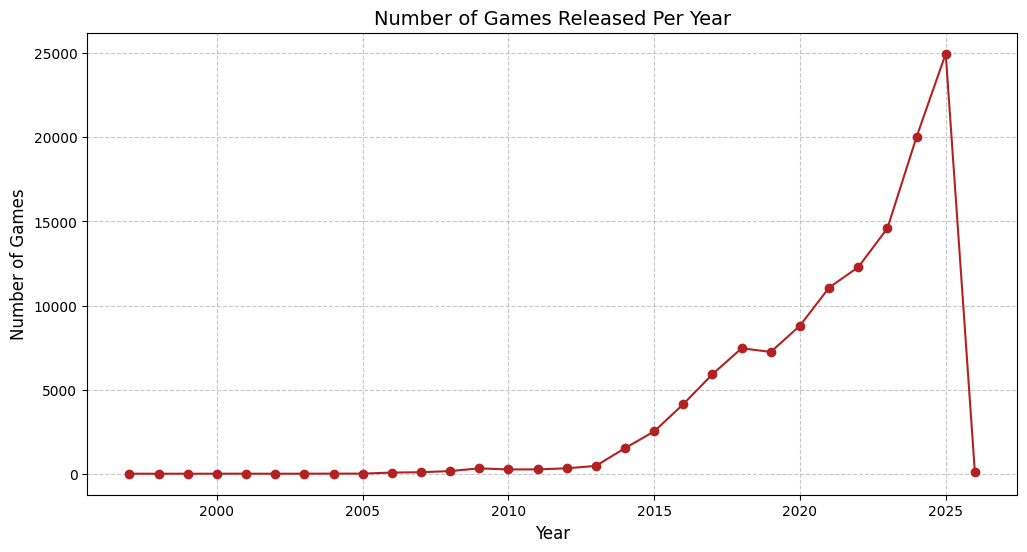

In [153]:
games_per_year = df_clean["release_year"].value_counts().sort_index()

plt.figure(figsize=(12, 6))

plt.plot(games_per_year.index, games_per_year.values, marker='o', linestyle='-', color='firebrick')

plt.title("Number of Games Released Per Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Games", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Số lượng game phát hành tăng mạnh sau năm 2015.

Giai đoạn 2018–2023 là thời kỳ bùng nổ nội dung.

Điều này cho thấy Steam đang ngày càng dễ tiếp cận với Indie Developer.

Thị trường đang chuyển từ “ít game chất lượng cao” sang “rất nhiều game cạnh tranh cao”.

### OS Distribution

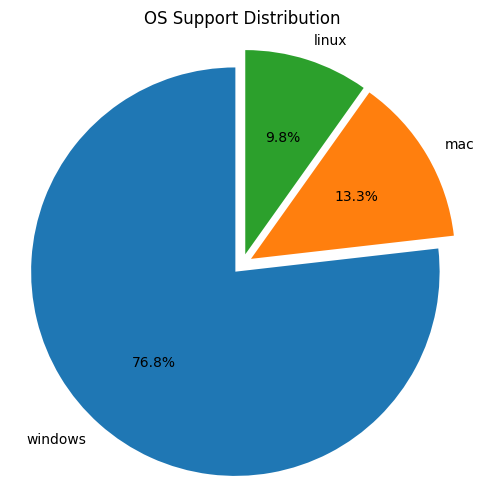

In [154]:
cols = ["windows", "mac", "linux"]

for col in cols:
    df_clean[col] = df_clean[col].astype(str).str.lower() == "true"

os_counts = df_clean[cols].sum()


plt.figure(figsize=(6,6))

plt.pie(
    os_counts,
    labels=os_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    explode=[0.05, 0.05, 0.05]
)

plt.title("OS Support Distribution")
plt.axis("equal")  # tròn đều
plt.show()

Windows vẫn là thị trường chủ lực.

Phát triển cho Linux có thể không mang lại ROI cao.

Cross-platform có thể giúp tăng reach nhưng cần cân nhắc chi phí dev.

### Top 10 Publishers

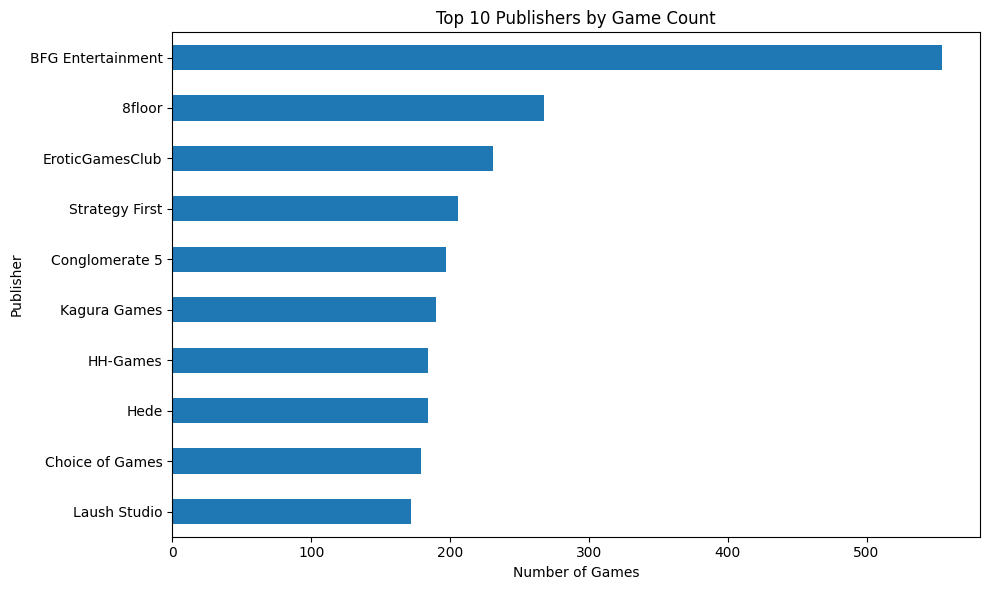

In [155]:
top_publishers = (
    df_clean["publishers"]
        .loc[df_clean["publishers"] != "Unknown"]
        .value_counts()
        .head(10)
)


plt.figure(figsize=(10,6))
top_publishers.sort_values().plot(kind="barh")

plt.title("Top 10 Publishers by Game Count")
plt.xlabel("Number of Games")
plt.ylabel("Publisher")

plt.tight_layout()
plt.show()

Một số publisher phát hành số lượng game rất lớn.

Thị trường có sự tồn tại của "high-volume publishers".

Tuy nhiên, số lượng game nhiều không đồng nghĩa với doanh thu cao.

### Top 10 Games by Estimated Revenue

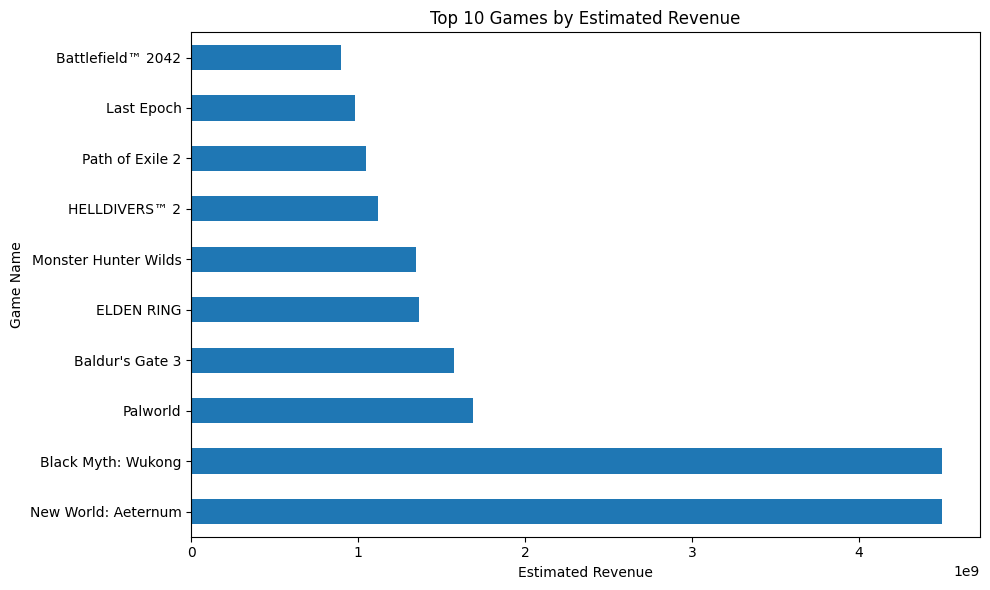

In [156]:
top_game_revenue = (
    df_clean.groupby("name")["estimated_revenue"].sum().sort_values(ascending=False).head(10)
)


plt.figure(figsize=(10,6))
top_game_revenue.plot(kind="barh")

plt.title("Top 10 Games by Estimated Revenue")
plt.xlabel("Estimated Revenue")
plt.ylabel("Game Name")

plt.tight_layout()
plt.show()

Một số game chiếm phần lớn doanh thu toàn thị trường.

### Revenue by Year

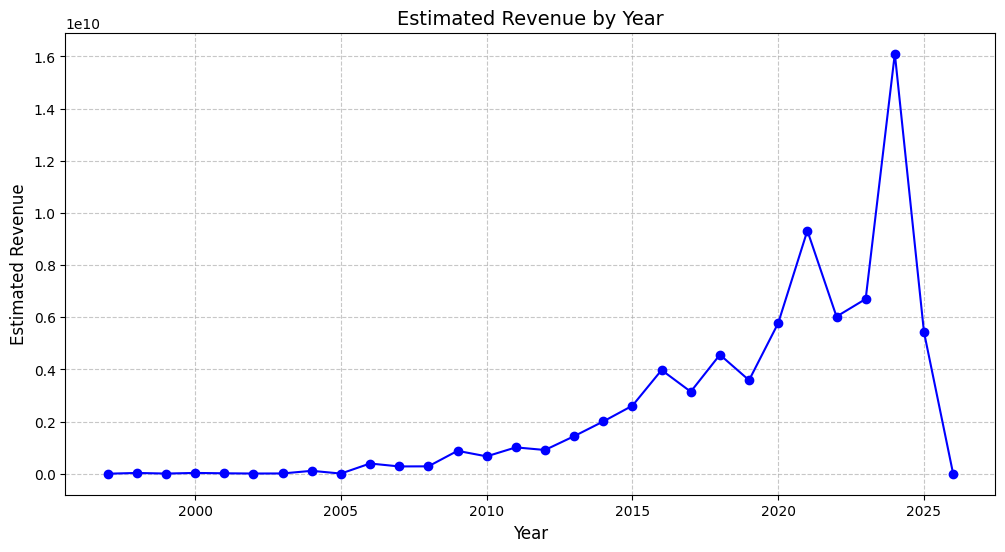

In [157]:
revenue_by_year = df_clean.groupby("release_year")["estimated_revenue"].sum()

plt.figure(figsize=(12, 6))

plt.plot(revenue_by_year.index, revenue_by_year.values, marker='o', linestyle='-', color='blue')

plt.title("Estimated Revenue by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Estimated Revenue", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Doanh thu toàn thị trường tăng theo thời gian.

Có thể thấy giai đoạn bùng nổ mạnh sau 2019 đỉnh điểm là 2024

Tăng mạnh là do ra những con game siêu phẩm, đứng top đầu trong những năm qua

### Review Ratio Distribution

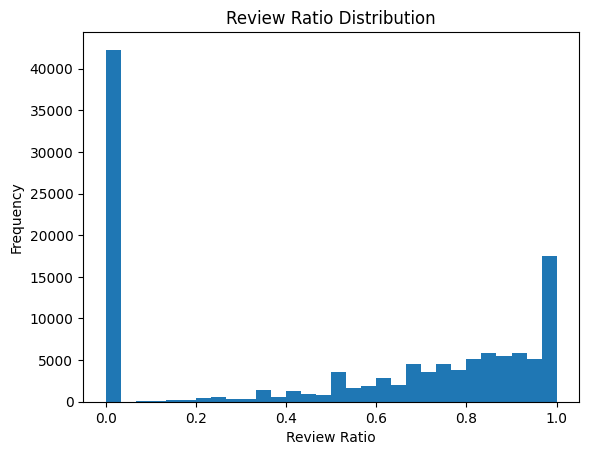

In [158]:
plt.hist(df_clean["review_ratio"], bins=30)
plt.title("Review Ratio Distribution")
plt.xlabel("Review Ratio")
plt.ylabel("Frequency")
plt.show()

### Top Rated Games (Min 1000 reviews)

In [159]:
top_rated = df_clean[df_clean["total_reviews"] > 1000] \
    .sort_values("review_ratio", ascending=False) \
    .head(10)

print(top_rated[["name", "review_ratio", "total_reviews"]])

                                                 name  review_ratio  \
14804                                     Kabuto Park      0.999035   
25367  Aokana - Four Rhythms Across the Blue - EXTRA2      0.996070   
89584                                     Beastieball      0.995719   
22812                            A Tower Full of Cats      0.994921   
34449                                 The WereCleaner      0.994367   
85715                           A Castle Full of Cats      0.994263   
40335                                 Great God Grove      0.993355   
71333                     Monster Prom 4: Monster Con      0.993075   
58458                      Dialtown: Phone Dating Sim      0.992835   
1939                                     The Upturned      0.992809   

       total_reviews  
14804           1036  
25367           1781  
89584           1168  
22812           1969  
34449          10119  
85715           4009  
40335           1204  
71333           1444  
58458      

### MACHINE LEARNING SECTION

In [160]:
import numpy as np

# Tạo review metrics
df_clean["total_reviews"] = (
    df_clean["positive"] + df_clean["negative"]
)

df_clean["positive_ratio"] = (
    df_clean["positive"] / df_clean["total_reviews"]
)

df_clean["positive_ratio"] = df_clean["positive_ratio"].fillna(0)

In [161]:
y = np.log1p(df_clean["estimated_owners_mid"])

In [162]:
features = [
    "price",
    "release_year",
    "positive_ratio",
    "total_reviews",
    "windows",
    "mac",
    "linux"
]

X = df_clean[features]

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Linear R2:", r2_score(y_test, y_pred_lr))
print("RF R2:", r2_score(y_test, y_pred_rf))

Linear R2: 0.42867711964608834
RF R2: 0.7683534038857773


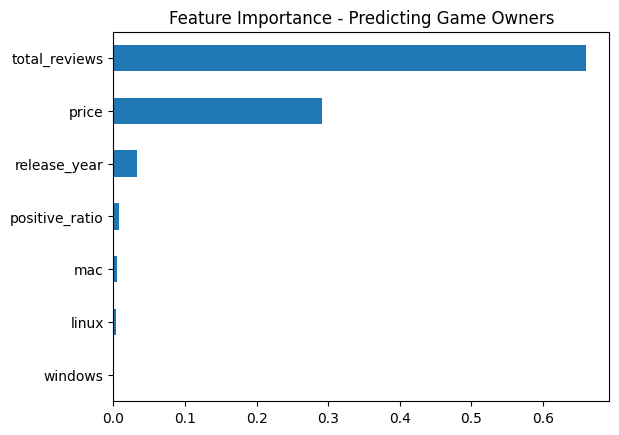

In [164]:
import pandas as pd
import matplotlib.pyplot as plt

importance = rf.feature_importances_

feat_imp = pd.Series(importance, index=features)
feat_imp.sort_values().plot(kind="barh")

plt.title("Feature Importance - Predicting Game Owners")
plt.show()

In [165]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X, y, cv=5, scoring="r2")
print("Cross-Validation R2:", scores.mean())

Cross-Validation R2: 0.7550330991104898


          Feature  Importance
3   total_reviews    0.659927
0           price    0.291922
1    release_year    0.032463
2  positive_ratio    0.007120
5             mac    0.004251
6           linux    0.004086
4         windows    0.000231


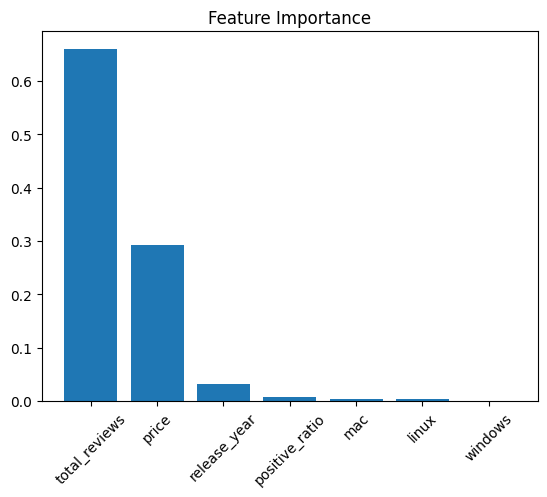

In [166]:
import pandas as pd
import matplotlib.pyplot as plt

importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(feature_importance_df)

plt.figure()
plt.bar(feature_importance_df["Feature"], feature_importance_df["Importance"])
plt.xticks(rotation=45)
plt.title("Feature Importance")
plt.show()

Các yếu tố như số lượng người sở hữu, số lượng đánh giá tích cực và giá game có ảnh hưởng mạnh đến doanh thu.

Các yếu tố như hệ điều hành hỗ trợ có ảnh hưởng ở mức độ thấp hơn.